In [10]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch

In [4]:
img_names=list(glob.glob('.venv/NPL Projects/Text to image search/photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [8]:
img_model = SentenceTransformer('clip-VIT-B-32')

In [13]:
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

C:\Users\bhara\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhara\.cache\huggingface\hub\models--sentence-transformers--clip-ViT-B-32-multilingual-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.65k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

In [9]:
img_embeddings = img_model.encode( [Image.open(img) for img in img_names],convert_to_tensor=True,batch_size=32,show_progress_bar=True )

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [19]:
img_folder = '.venv/NPL Projects/Text to image search/photos/'

def search(query,k=5):
    query_embeddings = model.encode([query],convert_to_tensor=True)
    
    hits = util.semantic_search(query_embeddings,img_embeddings,top_k=k)[0]
    
    print('Query:',query)
    for hit in hits:
        im = img_names[hit['corpus_id']]
        im2 = Image.open(im).convert('RGB')
        plt.imshow(im2)
        plt.axis('off')
        plt.show()

Query: Hund


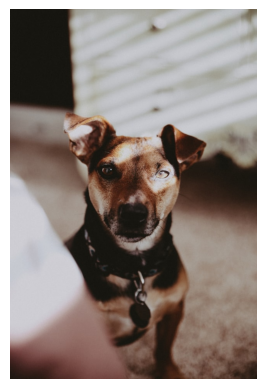

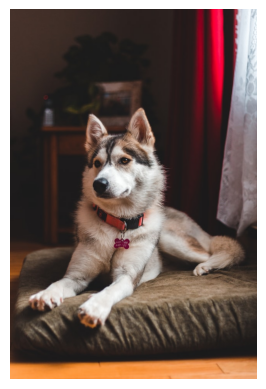

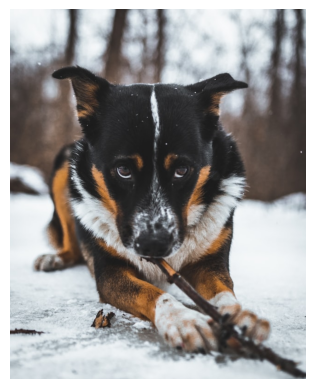

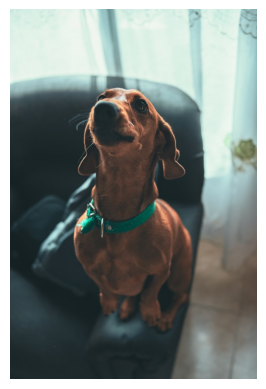

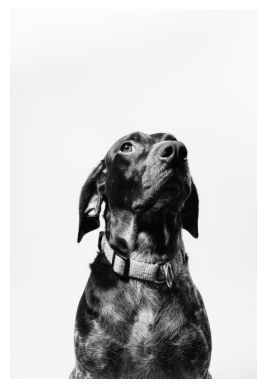

In [21]:
search('Hund')